In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
base = '../UTKFace'
X = []
y = []
for idx, face_path in enumerate(os.listdir(base)):
    full_path = os.path.join(base, face_path)

    img = cv2.imread(full_path)
    assert img is not None, "Image not loaded"
    cv2.cvtColor(img, cv2.COLOR_BGR2RGB, img)
    X.append(img)
    del img
    
    split_path = face_path.split("_")
    age = split_path[0]
    gender = split_path[1]

    y.append((age, gender))

In [3]:
%%time

X = np.stack(X)

X.shape

CPU times: user 798 ms, sys: 1.53 s, total: 2.33 s
Wall time: 2.33 s


(23708, 200, 200, 3)

In [4]:
%%time 

y = np.stack(y)

y.shape

CPU times: user 31.4 ms, sys: 0 ns, total: 31.4 ms
Wall time: 30.6 ms


(23708, 2)

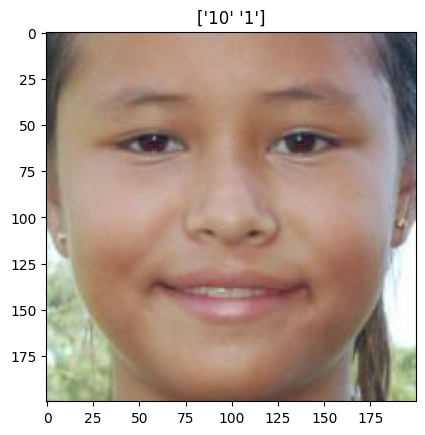

In [5]:
i = 150
plt.imshow(X[i])
plt.title(str(y[i]))
plt.show()

In [6]:
y = y.astype(int)
y.dtype

dtype('int64')

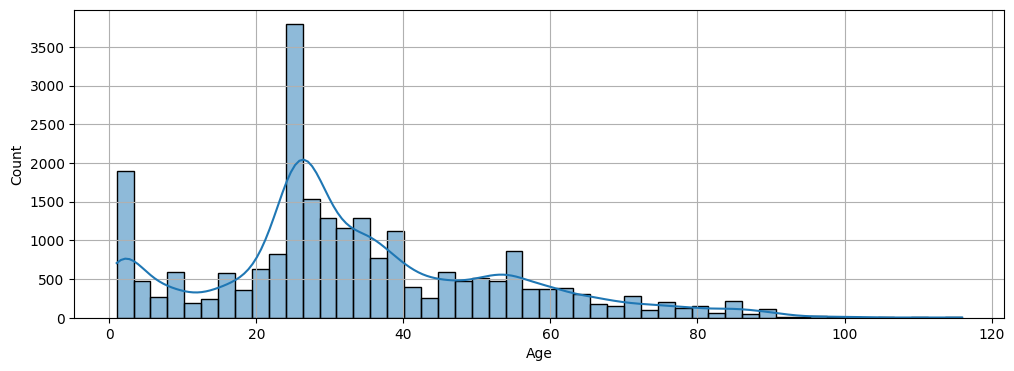

In [7]:
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.histplot(x=y[:, 0], bins=50, label='Age', kde=True)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [8]:
y[:, 0].min(), y[:, 0].max(), y[:, 0].mean()

(np.int64(1), np.int64(116), np.float64(33.303484056014845))

In [9]:
%%time
np.savez('data.npz', X=X, y=y)

CPU times: user 4.82 s, sys: 1.8 s, total: 6.62 s
Wall time: 6.64 s


In [10]:
males = (y[:, 1] == 0).sum() / y.shape[0]
famales = (y[:, 1] == 1).sum() / y.shape[0]
males, famales

(np.float64(0.5226505820819977), np.float64(0.47734941791800234))

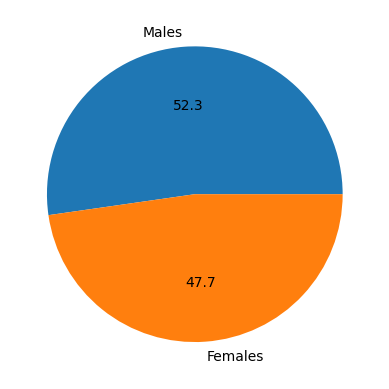

In [15]:
plt.pie(x=[males, famales], labels=['Males', 'Females'], autopct='%0.1f')
plt.show()

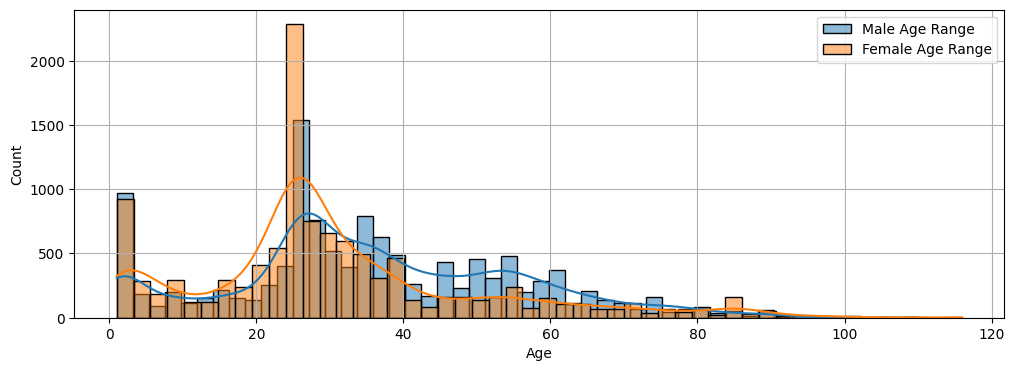

In [17]:
male_age_range = y[(y[:, 1] == 0), 0]
female_age_range = y[(y[:, 1] == 1), 0]

plt.figure(figsize=(12, 4))
sns.histplot(x=male_age_range, bins=50, label='Male Age Range', kde=True)
sns.histplot(x=female_age_range, bins=50, label='Female Age Range', kde=True)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [21]:
def change_range(age_range):
    scaled_age_range = ((age_range - age_range.min()) * (1 - 0)) / (age_range.max() - age_range.min())
    scaled_age_range += 0
    return scaled_age_range

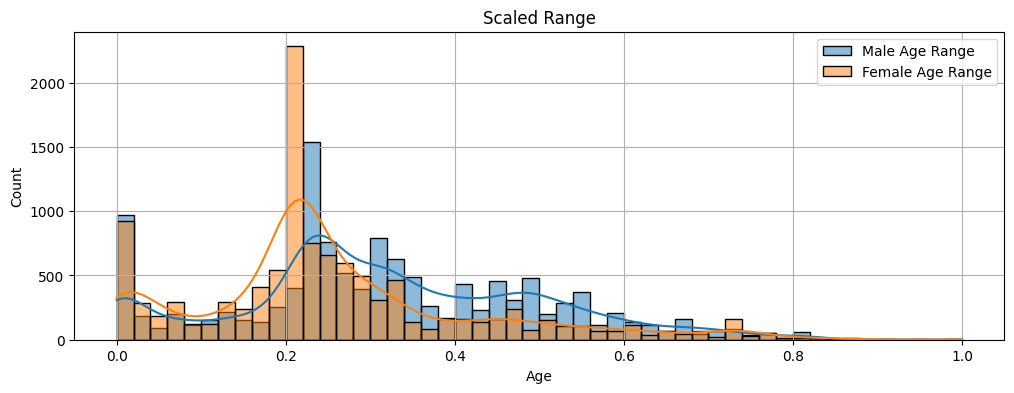

In [22]:
scaled_male_age_range = change_range(y[(y[:, 1] == 0), 0])
scaled_female_age_range = change_range(y[(y[:, 1] == 1), 0])

plt.figure(figsize=(12, 4))
sns.histplot(x=scaled_male_age_range, bins=50, label='Male Age Range', kde=True)
sns.histplot(x=scaled_female_age_range, bins=50, label='Female Age Range', kde=True)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title("Scaled Range")
plt.show()